<a href="https://colab.research.google.com/github/kuheli31/Deep-Learning/blob/main/Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model


In [1]:
#Importing Tensorflow
import tensorflow as tf
print(tf.__version__)

2.18.0


# Creating Data to View and Fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

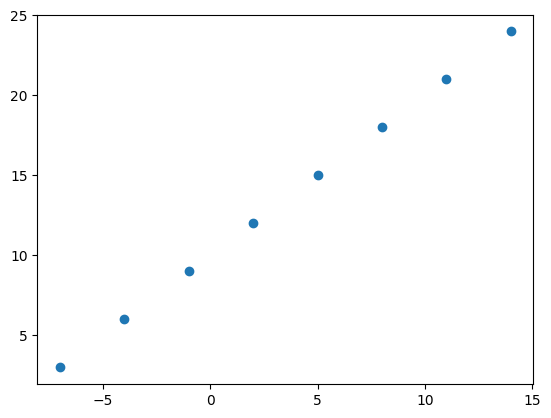

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [4]:
# Example input and output shapes of a regression model
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
house_info.shape

TensorShape([3])

Our goal here will be to use `X` to predict `y`.

So our **input** will be `X` and our **output** will be `y`.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [6]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as output some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [7]:
# Let's take a look at the single examples invidually
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - loss: 20.4092 - mae: 20.4092
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 20.1280 - mae: 20.1280
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 19.8467 - mae: 19.8467
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 19.5655 - mae: 19.5655
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 19.2842 - mae: 19.2842


In [11]:
# Check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [12]:
# Make a prediction with the model
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[-20.301243]], dtype=float32)

In [13]:
y_pred + 11

array([[-9.301243]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 20.5730 - mae: 20.5730
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 20.2917 - mae: 20.2917
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 20.0105 - mae: 20.0105
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 19.7292 - mae: 19.7292
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 19.4480 - mae: 19.4480
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 19.1667 - mae: 19.1667
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 18.8855 - mae: 18.8855
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 18.6042 - mae: 18.6042
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 18.3230 - mae: 18.3230
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 18.0417 - mae: 18.0417
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 17.7605 - mae: 17.7605
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 17.4792 - mae: 17.4792
Epoch 13/100
1/1 ━

In [15]:
# Remind ourselves of what X and y are
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [16]:
# Try and predict what y would be if X was 18.0
model.predict(np.array([18.0])) # the right answer is 28.0 (y = X + 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[31.090841]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

In [17]:
#Let's see if we can make another to improve our model

#Create the model (this time with an extra hidden layer with 100 units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.4743 - mae: 13.4743
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 12.7238 - mae: 12.7238
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.9635 - mae: 11.9635
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.1995 - mae: 11.1995
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.4281 - mae: 10.4281
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.7990 - mae: 9.7990
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.2405 - mae: 9.2405
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.6546 - mae: 8.6546
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.0450 - mae: 8.0450
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.4122 - mae: 7.4122
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.7523 - mae: 6.7523
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.0604 - mae: 6.0604
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [18]:
# Try and predict what y would be if X was 18.0
model.predict(np.array([18.0])) # the right answer is 28.0 (y = X + 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[27.182465]], dtype=float32)

## Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [19]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [20]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Since $y=X+10$, we could make the labels like so:

In [21]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [22]:
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [23]:
# Check how many samples we have
len(X)

50

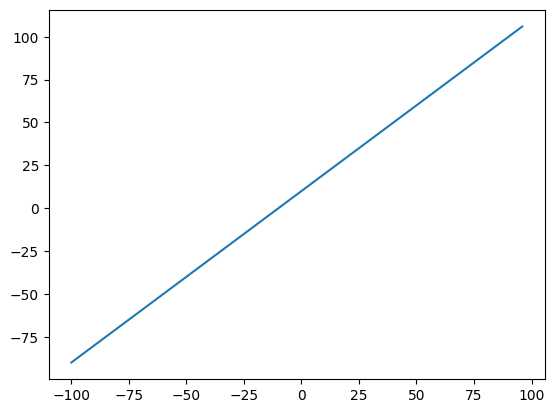

In [24]:
#Visualize the data
import matplotlib.pyplot as plt
plt.plot(X, y)

In [25]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

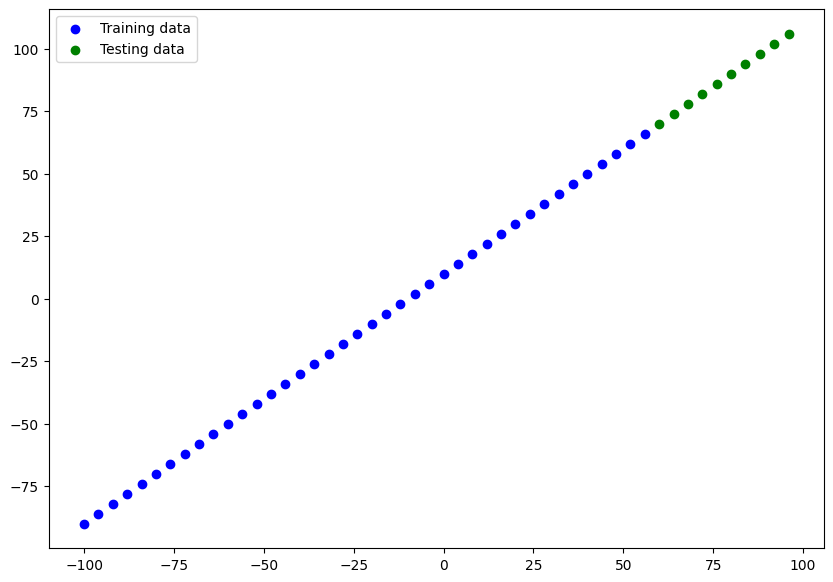

In [26]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [31]:
#Set random seed
tf.random.set_seed(42)

#Create a model same as above
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

## Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) on it.

> 🔑 **Note:** Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [33]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
from os import name
#Set random seed
tf.random.set_seed(42)

#Create a model same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10 , input_dim=1 ,name="input_layer"),
    tf.keras.layers.Dense(1 , name="output_layer")],
    name="model_1")

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [60]:
# This will work after specifying the input shape
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

Let's fit our model to the training data.

In [61]:
#Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100 , verbose=0) #verbose controls how much gets output

In [62]:
# Check the model summary
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Alongside summary, you can also view a 2D plot of the model using [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

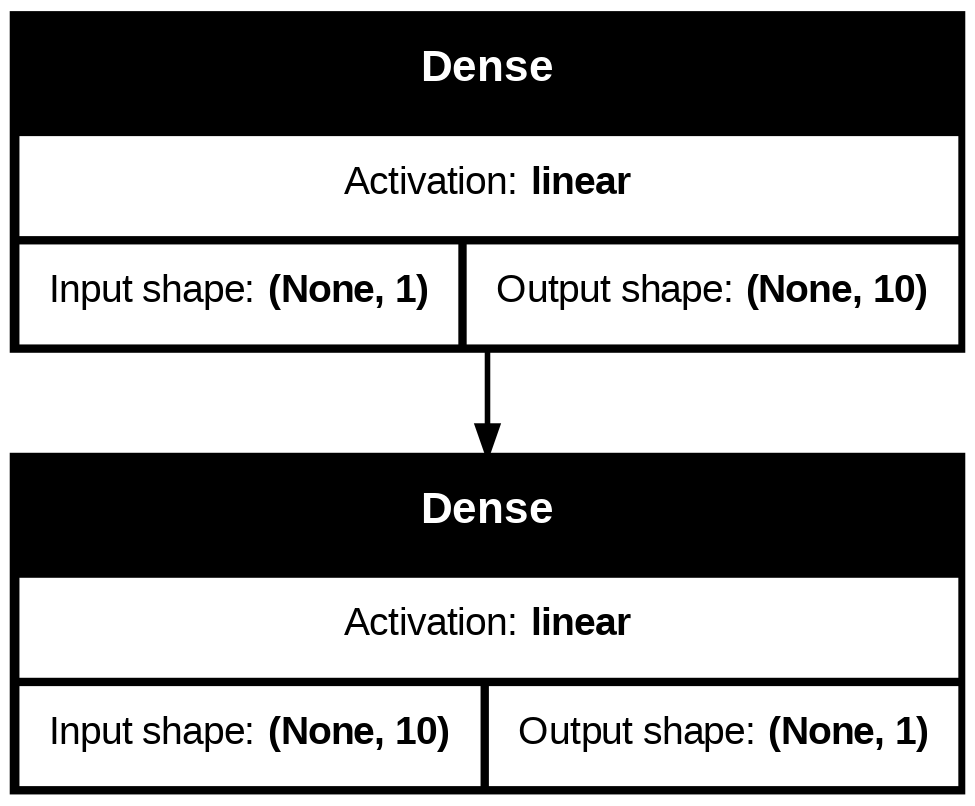

In [64]:
from tensorflow.keras.utils import plot_model

#visualize your model
plot_model(model, show_shapes=True , show_layer_activations=True)


## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [50]:
# Make predictions
y_preds = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [51]:
# View the predictions
y_preds

array([[ 69.24123 ],
       [ 73.762726],
       [ 78.284225],
       [ 82.805725],
       [ 87.327225],
       [ 91.848724],
       [ 96.37022 ],
       [100.891716],
       [105.413216],
       [109.934715]], dtype=float32)

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

> 🔑 **Note:** If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [65]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

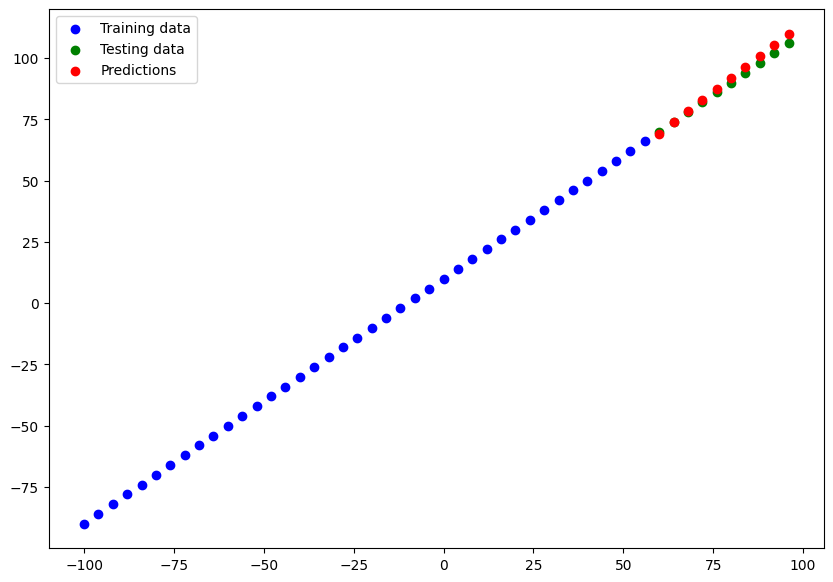

In [66]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

From the plot we can see our predictions aren't totally outlandish but they definitely aren't anything special either.

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [90]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 44.5691 - mae: 44.5691


[44.56905746459961, 44.56905746459961]

In our case, since we used MAE for the loss function as well as MAE for the metrics, `model.evaulate()` returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

In [91]:
# Create the MAE loss object
mae = tf.keras.losses.MeanAbsoluteError()

# Use it like a function with true and predicted values
mae_result = mae(y_test, y_preds)

# Print the result
print('Mean Absolute Error:', mae_result.numpy())


Mean Absolute Error: 1.7871811


In [92]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [93]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[ 69.24123 ],
       [ 73.762726],
       [ 78.284225],
       [ 82.805725],
       [ 87.327225],
       [ 91.848724],
       [ 96.37022 ],
       [100.891716],
       [105.413216],
       [109.934715]], dtype=float32)

In [94]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using [`squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze), it'll remove the the `1` dimension from our `y_preds` tensor, making it the same shape as `y_test`.

> 🔑 **Note:** If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, *many* errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [95]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [96]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [97]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 69.24123 ,  73.762726,  78.284225,  82.805725,  87.327225,
         91.848724,  96.37022 , 100.891716, 105.413216, 109.934715],
       dtype=float32))

Okay, now we know how to make our `y_test` and `y_preds` tensors the same shape, let's use our evaluation metrics.

In [98]:
# Create the MAE loss object
mae = tf.keras.losses.MeanAbsoluteError()

# Use it like a function with true and predicted values
mae_result = mae(y_test, tf.squeeze(y_preds)) # use squeeze() to make same shape

# Print the result
print('Mean Absolute Error:', mae_result.numpy())


Mean Absolute Error: 1.7871811


In [99]:
mse = tf.keras.losses.MeanSquaredError()
mse_result = mse(y_test, tf.squeeze(y_preds))

print("Mean Squared Error:", mse_result.numpy())

Mean Squared Error: 4.765329


In [101]:
# Returns the same as tf.keras.losses.MeanAbsoluteError()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=1.7871810913085937>

In [102]:
import tensorflow as tf

def mae(y_test, y_pred):
    """
    Calculates mean absolute error between y_test and y_pred.
    """
    return tf.keras.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
    """
    Calculates mean squared error between y_test and y_pred.
    """
    return tf.keras.metrics.mean_squared_error(y_test, y_pred)


## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [103]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 21.5066 - mae: 21.5066
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 10.4396 - mae: 10.4396
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.9725 - mae: 9.9725   
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.6546 - mae: 11.6546 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.6135 - mae: 8.6135
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.0823 - mae: 10.0823 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.8002 - mae: 11.8002
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.7233 - mae: 8.7233
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.1920 - mae: 10.1920
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.9532 - mae: 11.9532 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.6870 - mae: 12.6870
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.1564 - mae: 8.1564
Epoch 13/100
2/2 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


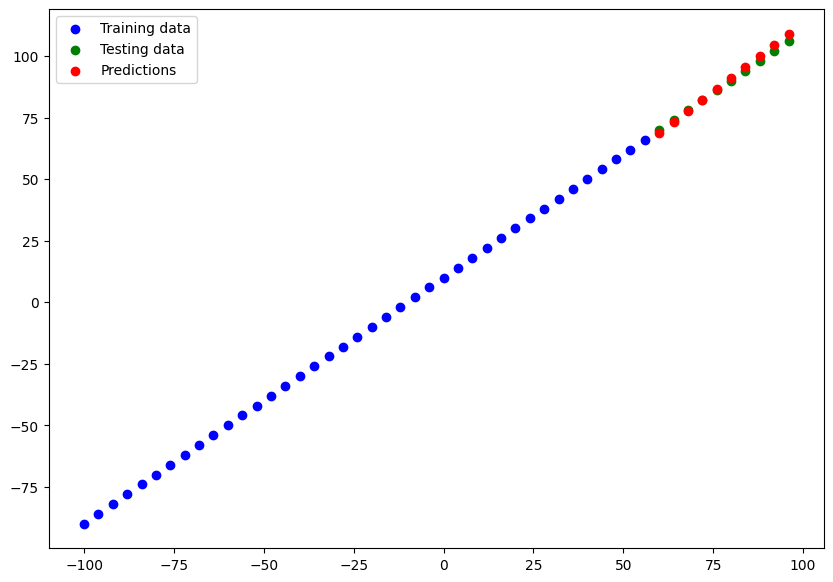

In [104]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [106]:
def mae(y_test, y_pred):
    """
    Calculates mean absolute error between y_test and y_pred.
    """
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mae_metric.update_state(y_test, y_pred)
    return mae_metric.result()

def mse(y_test, y_pred):
    """
    Calculates mean squared error between y_test and y_pred.
    """
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mse_metric.update_state(y_test, y_pred)
    return mse_metric.result()

mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()

print("MAE:", mae_1)
print("MSE:", mse_1)


MAE: 1.3565918
MSE: 2.6559777


**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [107]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


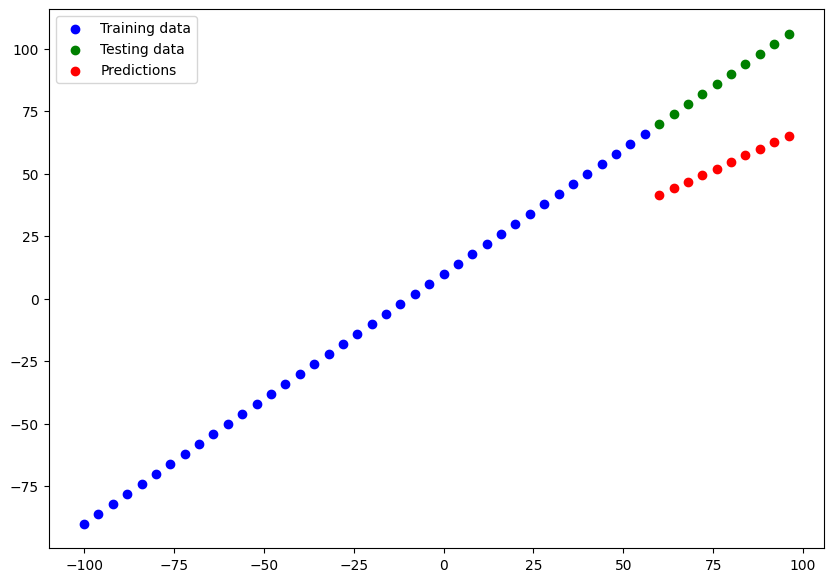

In [108]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [111]:
def mae(y_test, y_preds_2):
    """
    Calculates mean absolute error between y_test and y_pred.
    """
    mae_metric_2 = tf.keras.metrics.MeanAbsoluteError()
    mae_metric_2.update_state(y_test, y_preds_2)
    return mae_metric_2.result()

def mse(y_test, y_pred):
    """
    Calculates mean squared error between y_test and y_pred.
    """
    mse_metric_2 = tf.keras.metrics.MeanSquaredError()
    mse_metric_2.update_state(y_test, y_preds_2)
    return mse_metric_2.result()

mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()

print("MAE:", mae_2)
print("MSE:", mse_2)


MAE: 34.60373
MSE: 1212.7539


**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [112]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


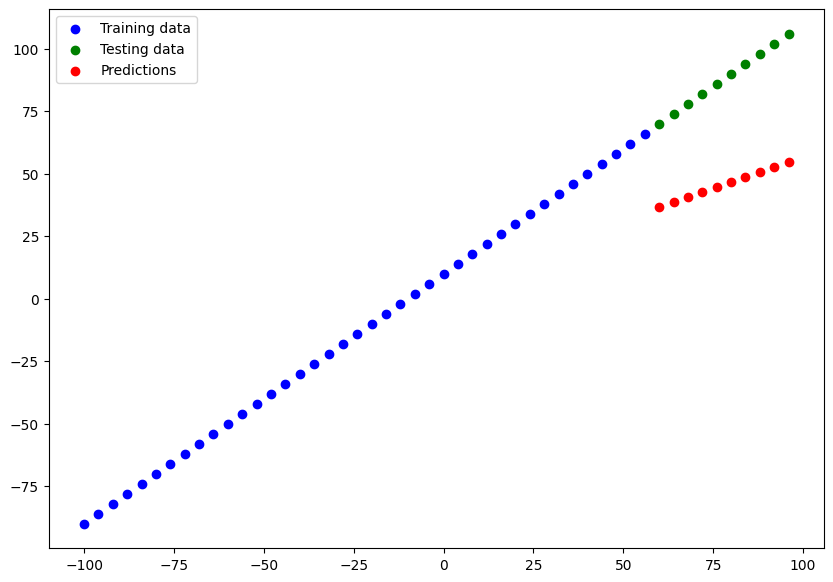

In [113]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [115]:
def mae(y_test, y_preds_3):
    """
    Calculates mean absolute error between y_test and y_pred.
    """
    mae_metric_3 = tf.keras.metrics.MeanAbsoluteError()
    mae_metric_3.update_state(y_test, y_preds_3)
    return mae_metric_3.result()

def mse(y_test, y_pred):
    """
    Calculates mean squared error between y_test and y_pred.
    """
    mse_metric_3 = tf.keras.metrics.MeanSquaredError()
    mse_metric_3.update_state(y_test, y_preds_3)
    return mse_metric_3.result()

mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()

print("MAE:", mae_3)
print("MSE:", mse_3)


MAE: 42.35905
MSE: 1826.3535


## Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [116]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [117]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.356592,2.655978
1,model_2,34.603729,1212.753906
2,model_3,42.359051,42.359051


model_1 performed better

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 **Resource:** But as you build more models, you'll want to look into using tools such as:
* [**TensorBoard**](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* [**Weights & Biases**](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model?hl=en) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [119]:
# Use .h5 extension to save in HDF5 format
model_1.save("best_model.h5")


In [120]:
# Use .keras extension (recommended in Keras 3.x)
model_1.save("best_model.keras")


## Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [122]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model.keras")
loaded_saved_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4 (20.00 B)

In [123]:
# Compare model_2 with the model_1 (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


np.False_

## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [125]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>